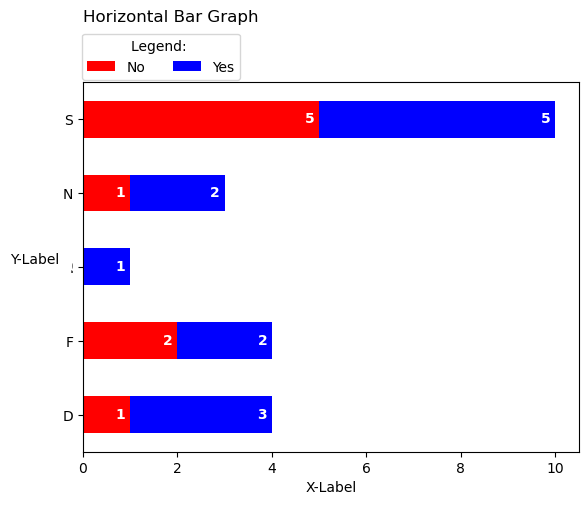

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data
data = pd.read_csv("csv/bar_assignment.csv")

# Transform COUNT values
data["COUNT"] = data["COUNT"].map({1: "Yes", 0: "No"})

# Count occurrences of Yes and No per LABEL
pivot_data = data.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)

# Plot
ax = pivot_data.plot(kind="barh", stacked=True, color=["red", "blue"])
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() - 0.1, 
                bar.get_y() + bar.get_height() / 2, 
                int(bar.get_width()), 
                ha="right", va="center", color="white", fontsize=10, fontweight="bold")
            
plt.xlabel("X-Label")
plt.ylabel("Y-Label", rotation=0, labelpad=20)
# plt.axis([0, 10])
# plt.title("Horizontal Stacked Bar Chart")
plt.legend(bbox_to_anchor=(0.33, 1.15), ncol = 2, title="Legend: ")
plt.title("Horizontal Bar Graph\n\n\n", loc="left")
plt.show()

In [167]:
import pandas as pd
import plotly.graph_objects as go

# Load data
data = pd.read_csv("csv/sankey_assignment.csv")

# Define the labels for the features, central nodes (S, I, D, F, N), and final categories (Reg, Aca, Oth)
feature_labels = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
central_labels = ['S', 'F', 'D', 'N', 'I']
final_labels = ['Reg', 'Aca', 'Oth']

# Complete list of all nodes
labels = feature_labels + central_labels + final_labels

# Mapping for node indices
label_dict = {label: i for i, label in enumerate(labels)}

# Define sources, targets, and values for the Sankey diagram
sources = []
targets = []
values = []

# Map 'LABEL' column to central nodes
for index, row in data.iterrows():
    label = row['LABEL']  # 'LABEL' contains the central node values (S, F, D, N, I)
    
    # Connect the feature columns to central nodes (S, I, D, F, N)
    for feature in feature_labels:
        sources.append(label_dict[feature])
        targets.append(label_dict[label])  # Map the label to central node
        values.append(row[feature])

# Connect central nodes (S, I, D, F, N) to the final labels (Reg, Aca, Oth)
for index, row in data.iterrows():
    label = row['LABEL']  # 'LABEL' contains the central node values (S, F, D, N, I)
    
    for central in central_labels:
        for final in final_labels:
            sources.append(label_dict[central])
            targets.append(label_dict[final])
            values.append(row[final])

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

# Adjust the layout
fig.update_layout(
    title_text="Sankey Diagram: Feature to Label Connections",
    font_size=10,
    width=500,
    height=600
)

fig.show()
